In [108]:
import pandas as pd
import numpy as np

df = pd.read_csv('strokeData.csv')
print("type(df)-->",type(df))

df.head()

type(df)--> <class 'pandas.core.frame.DataFrame'>


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [109]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [110]:
print("df.shape -->", df.shape)
print("Rows     -->", df.shape[0])
print("Columns  -->", df.shape[1])

df.shape --> (5110, 12)
Rows     --> 5110
Columns  --> 12


In [111]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [113]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

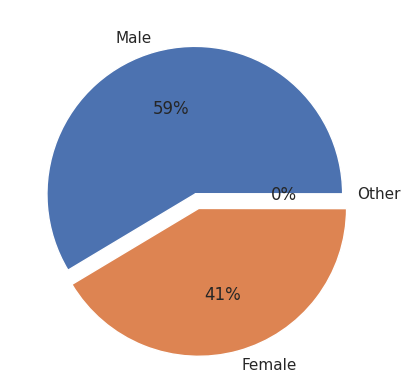

In [114]:
# importing libraries
import matplotlib.pyplot as plt
import seaborn

# declaring data
data = df['gender'].value_counts()
keys = ['Male', 'Female', 'Other']
explode = [0, 0.1, 0]
# plotting data on chart
plt.pie(data, labels=keys,explode=explode,autopct='%.0f%%')

# displaying chart
plt.show()

In [115]:
stroke=[1]
gender=['Male','Female']
peoplesaffected_by_stroke=df.loc[df['stroke'].isin(stroke)]
males=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['gender']==gender[0]])
females=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['gender']==gender[1]])
print('Overall peoples affected by strokes:',len(peoplesaffected_by_stroke))
print('proportion of males:',males)
print('proportion of females:',females)

Overall peoples affected by strokes: 249
proportion of males: 108
proportion of females: 141


In [116]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [117]:
smoking_status=['formerly smoked','never smoked','smokes','Unknown']
never_smoked=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[1]])
formerly_smoked=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[0]])
smoked=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[2]])
unknown=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['smoking_status']==smoking_status[3]])
print('never_smoked:',never_smoked)
print('formerly_smoked:',formerly_smoked)
print('smoked:',smoked)
print('Unknown:',unknown)

never_smoked: 90
formerly_smoked: 70
smoked: 42
Unknown: 47


In [118]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [119]:
marriage_status=['Yes','No']
married=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['ever_married']==marriage_status[0]])
not_married=len(peoplesaffected_by_stroke[peoplesaffected_by_stroke['ever_married']==marriage_status[1]])
print("Married:",married)
print('Not married:',not_married)

Married: 220
Not married: 29


In [120]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [121]:
stroke = df.loc[df['stroke']== 1].reset_index()

stroke["male_age"]=stroke[stroke["gender"]=="Male"]["age"]
stroke["female_age"]=stroke[stroke["gender"]=="Female"]["age"]
stroke[["male_age","female_age"]].iplot(kind="histogram", bins=20, theme="white", title="Stroke Ages",
         xTitle='Ages', yTitle='Count')

**Data PreProcessing**

In [122]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [123]:
df.index

RangeIndex(start=0, stop=5110, step=1)

In [124]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [125]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [126]:
temp_df = df.drop_duplicates()

In [127]:
mean1 = df['bmi'].mean()
print(mean1)
df = df['bmi'].fillna(mean1)

28.893236911794666


In [128]:
df.drop_duplicates()

0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
4704    48.100000
4779    51.700000
4894    46.300000
4906    54.100000
4930    14.900000
Name: bmi, Length: 419, dtype: float64

In [129]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']=label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']=label_encoder.fit_transform(df['smoking_status'])
df['gender']=label_encoder.fit_transform(df['gender'])

df

KeyError: 'ever_married'

In [ ]:
import matplotlib.pyplot as mp
import seaborn as sns
data = df

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
sns.set_theme(style="whitegrid")
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=False)

# displaying heatmap
mp.show()

TypeError: Series.corr() missing 1 required positional argument: 'other'

**ML Modeling**

In [ ]:
X = df["stroke"]
y = df.drop(['stroke'], axis=1)

In [ ]:
df.isnull().sum()

0

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV

x_train, x_test, y_train, y_test = train_test_split(y, X, test_size=0.30, shuffle=True, random_state=0)

In [130]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values